# AirBnB Dataset Exploration 
## by Aayush Soni

## Introduction
The dataset consists of three separate tables :
> * calendar.csv : This holds data of the various times a rental unit was used and its related data
> * listings.csv : This holds data of each rental unit as well as inforation on the host
> * reviews.csv : This holds data of reviews give each time a unit was rented. This dataset is not used in the analysis.

In our analysis we will try to answer these questions:
> * Which house is the most popular type in each area?
> * When does each house have the highest price?
> * What features help determine the house price, i.e. can we suggest an optimal price point for a give rental unit?

The information of most important columns used in each dataset is given below:
> *calendar.csv*
> * **listing_id** : Unique identifer for rental unit
> * **date** : When the unit was rented (datetime)
> * **available** : whether unit was rented on that date ( boolean)
> * **price** : Price per day for rental (float)

> *listings.csv*
> * **id** : Unique identifer for rental unit
> * **host_response_time** : response time for host ( categorical data)
> * **host_response_rate** : response rate of host ( percentage)
> * **host_is_superhost** : Whether host is a superhost or not (boolean)
> * **neighbourhood_cleansed** : neighborhood of the unit. Some preliminary processing has been applied to it
> * **zipcode** : Zip code of the unit
> * **property_type** : type of unit, e.g. apartment, house, tent, etc.
> * **acomodates** : number of people for default charges
> * **bathrooms** : number of bathrooms available
> * **bedroons** : number of bedrooms
> * **amenities** : list of amenities available in the unit
> * **price** : cost (USD) per night
> * **review_scores_rating** : unit review out of 5







## 1. Preliminary Wrangling

In [1]:
## Initial imports and data loading
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing

df_calendar=pd.read_csv('calendar.csv')
df_listings=pd.read_csv('listings.csv')
#df_reviews=pd.read_csv('reviews.csv')

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Explore calendar
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


We see that price is stored as an object. Price is NaN when 'available' field is 'f' i.e. False. 
Apart from price column, no data is missing.

In [4]:
#We will keep NaN price as negative
df_calendar.price = df_calendar.price.fillna("$-1.00").apply(lambda x : x[1:].replace(',','')).astype(float)

In [5]:
# Convert date column into datetime object
df_calendar.date = pd.to_datetime(df_calendar.date)

Now lets work on listings

In [6]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Most of these are of no interest to us. Let's remove the columns we dont need..
E.g. -

> * .*URL - will not be used
> * City/state - equal for all values
> * square_Feet,license - most/ all NaN's

In [8]:
cols_to_remove=['listing_url','scrape_id','last_scraped', 'experiences_offered','thumbnail_url',
                'medium_url','picture_url','xl_picture_url','host_url','host_thumbnail_url','host_picture_url',
                'host_total_listings_count','city','state','market','smart_location','country_code','country',
                'calendar_last_scraped','requires_license','license','jurisdiction_names','square_feet','neighbourhood']

df_listings.drop(cols_to_remove,axis=1,inplace=True)

In [9]:
# What is the count of NaN's in each column?
(df_listings.isna().sum().sort_values(ascending=False)).head(30)


monthly_price                  2301
security_deposit               1952
weekly_price                   1809
notes                          1606
neighborhood_overview          1032
cleaning_fee                   1030
transit                         934
host_about                      859
host_acceptance_rate            773
review_scores_accuracy          658
review_scores_checkin           658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
last_review                     627
first_review                    627
reviews_per_month               627
space                           569
host_response_rate              523
host_response_time              523
host_neighbourhood              300
summary                         177
bathrooms                        16
host_location                     8
zipcode                           7
bedrooms                    

In [10]:
# Count NaN's
df_listings.zipcode.isna().sum()

7

These 7 missing zipcodes can be filled with zipcodes based on neighbourhood.
We will take the mode of each neighbourhood and use that as the sample for the missing zipcodes.
E.g. if a certain area 'Lake City' has 200 counts of a certain zipcode 98122, and one count of an NaN zipcode, we can be confident that the NaN in area X should be Z1. 

In [11]:
#USe most common area name to fill in the missing zip codes
f = lambda x: x.mode().iloc[0]
df_listings.zipcode = df_listings.zipcode.fillna(df_listings.groupby('neighbourhood_cleansed').transform(f).zipcode)

In [12]:
df_listings.zipcode.value_counts()

zipcode
98122        421
98103        394
98102        341
98105        225
98109        202
98101        201
98144        201
98121        196
98107        181
98115        178
98112        167
98117        164
98118        154
98119        145
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98146          5
98134          5
99\n98122      1
Name: count, dtype: int64

We see some data error for one of the zipcodes... It's likely 98112, but lets check and verify that using the other columns

In [13]:
#df_listings.loc[df_listings.zipcode=='99\n98122']
print("Neighbourhood of erroneous zipcode is :\n ",df_listings.loc[df_listings.zipcode=='99\n98122']['neighbourhood_cleansed'])
df_listings.loc[df_listings.neighbourhood_cleansed=='Minor'].groupby('zipcode').id.count()

Neighbourhood of erroneous zipcode is :
  859    Minor
Name: neighbourhood_cleansed, dtype: object


zipcode
98122        133
98144          1
99\n98122      1
Name: id, dtype: int64

Since zipcode of "Minor" is 98122 by a large margin, we can safely say thats what it likely was

In [14]:
df_listings.zipcode = df_listings.zipcode.str.split('\n').str[-1]


In [15]:
#Cleanup of other columns
df_listings.price = df_listings.price.apply(lambda x :x[1:].replace(',','')).astype(float)
df_listings.first_review = pd.to_datetime(df_listings.first_review)
df_listings.last_review = pd.to_datetime(df_listings.last_review)

## 2. Data Analysis
### 2.a What is the distribution of houses in airbnb zipcodes?

In [16]:
#Number of listings per meighbourhood
df_listings.groupby('neighbourhood_cleansed').id.count().sort_values(ascending=0)


neighbourhood_cleansed
Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: id, Length: 87, dtype: int64

In [17]:
#Number of each property type
df_listings.groupby('property_type').id.count().sort_values(ascending=0)

property_type
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: id, dtype: int64

### 2.b How does the price of each type of property vary with time?

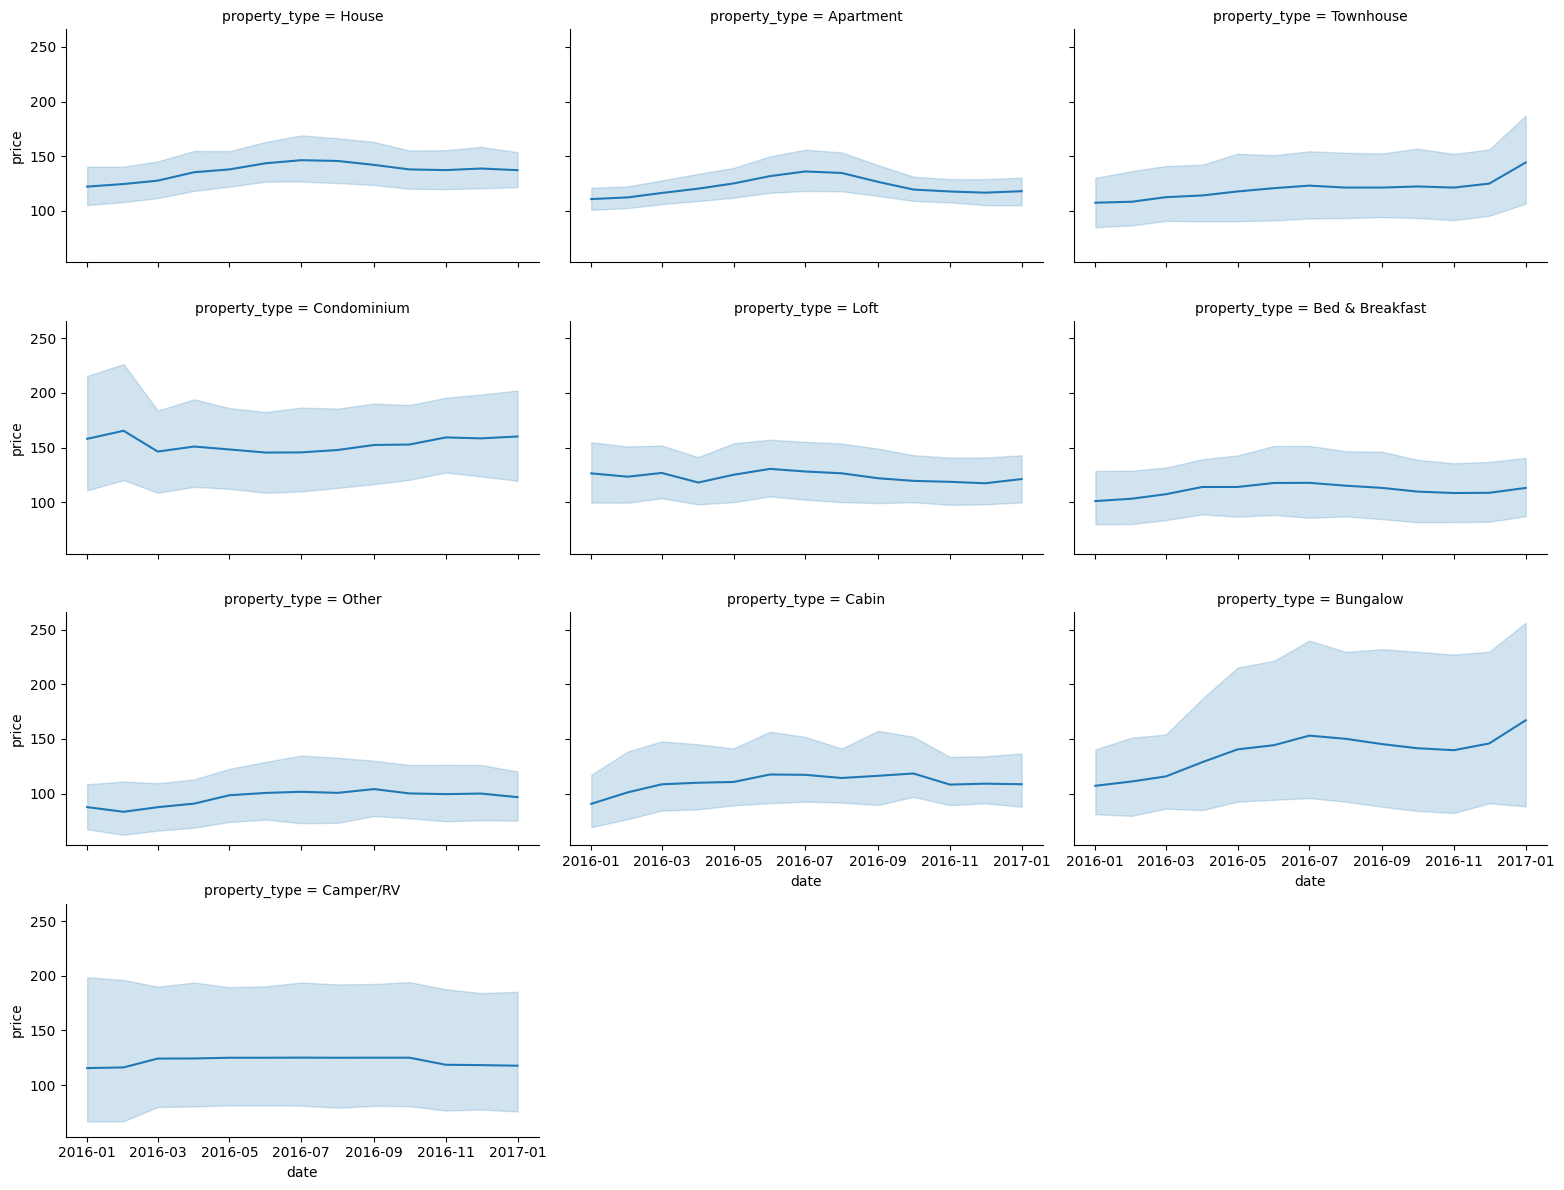

In [18]:
#create a table of listing id -> property_type
prop_type_order=df_listings.groupby('property_type').id.count().sort_values(ascending=0).head(10).index
# we will select the 25 most populous zip codes
zip_count = 25
zipcode_of_interest=df_listings.groupby('zipcode').id.count().sort_values(ascending=0).head(zip_count).index.tolist()

# Create a new DF that merges listings with property information
df_prop = pd.merge(df_calendar,df_listings[['property_type','id','zipcode']],left_on='listing_id',right_on='id').drop('id',axis=1)
df_prop['year']=df_prop.date.dt.year
df_prop['month']=df_prop.date.dt.month

#group by month and zipcode, find mean price
df_prop = df_prop.loc[df_prop.price>0].groupby(['year','month','property_type','zipcode'],as_index=False).price.mean()
df_prop['date']=pd.to_datetime(df_prop.year.astype(str)+'-'+df_prop.month.astype(str),format='%Y-%m')

g = sns.FacetGrid(data=df_prop.loc[df_prop['zipcode'].isin(zipcode_of_interest)],col='property_type',col_order=prop_type_order,col_wrap=3, aspect=1.75)

g.map(sns.lineplot,'date','price')


### 2.c What is the correlation matrix of the featuers of listings?

<Axes: >

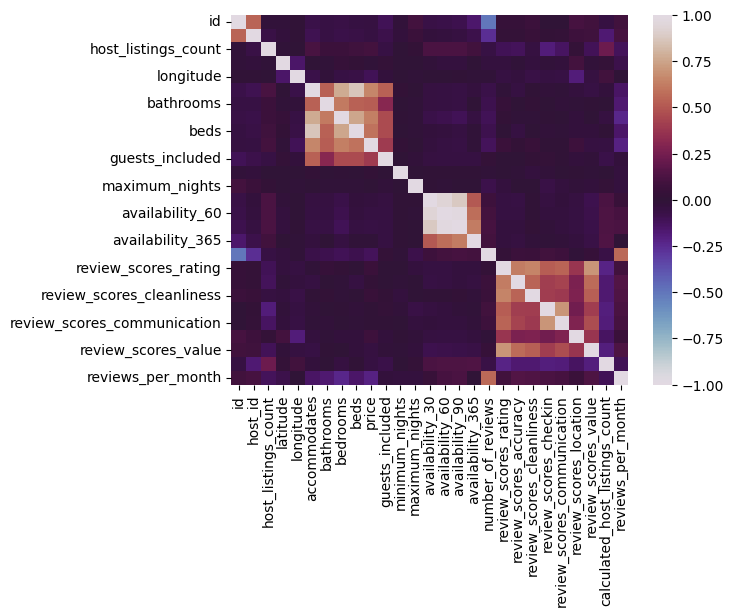

In [19]:
#Create a correlation matrix
c=df_listings.corr(numeric_only=True)

#Display as a heatmap
sns.heatmap(c,cmap='twilight',center=0,vmin=-1,vmax=1)#,annot=True,fmt=".1f");


### 2.d What is the distribution of propoerties across distance?

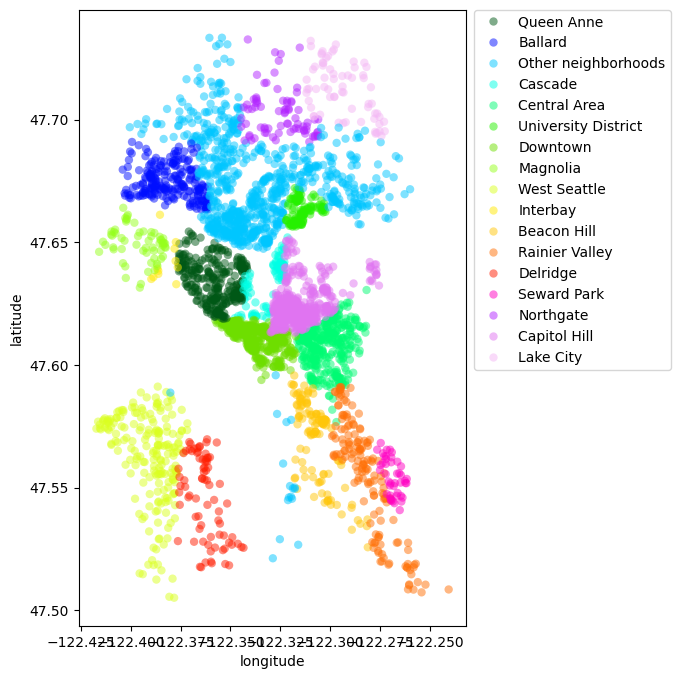

In [20]:
fig,axes= plt.subplots(1,1,figsize=(5,8))
pal='gist_ncar'
sns.scatterplot(data=df_listings,y='latitude',x='longitude',hue='neighbourhood_group_cleansed',palette=pal,linewidth=0,alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


Listings' amenities column is a column where each element holds a set of amenitis available. In this current form it is difficult to parse to determine whether a property has a particular amenity or not. 
Lets split this column into its constituent boolean features' columns.

In [21]:
l=set()
for i in df_listings.amenities.tolist():
    j=set(j for j in i[1:-1].split(',') if j)
    l=l.union(j)
l

{'"24-Hour Check-in"',
 '"Air Conditioning"',
 '"Buzzer/Wireless Intercom"',
 '"Cable TV"',
 '"Carbon Monoxide Detector"',
 '"Elevator in Building"',
 '"Family/Kid Friendly"',
 '"Fire Extinguisher"',
 '"First Aid Kit"',
 '"Free Parking on Premises"',
 '"Hair Dryer"',
 '"Hot Tub"',
 '"Indoor Fireplace"',
 '"Laptop Friendly Workspace"',
 '"Lock on Bedroom Door"',
 '"Other pet(s)"',
 '"Pets Allowed"',
 '"Pets live on this property"',
 '"Safety Card"',
 '"Smoke Detector"',
 '"Smoking Allowed"',
 '"Suitable for Events"',
 '"Washer / Dryer"',
 '"Wheelchair Accessible"',
 '"Wireless Internet"',
 'Breakfast',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Essentials',
 'Gym',
 'Hangers',
 'Heating',
 'Internet',
 'Iron',
 'Kitchen',
 'Pool',
 'Shampoo',
 'TV',
 'Washer'}

In [22]:
for i in l:
    df_listings[i]=df_listings.amenities.apply(lambda x : i in x)
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 109 entries, id to "Family/Kid Friendly"
dtypes: bool(41), datetime64[ns](2), float64(15), int64(12), object(39)
memory usage: 2.1+ MB


Now that we have cleaned dataset, we can start making predictions and try to create a model to determine optimal pricing per night for the properties

In [24]:
#predict based on below columns:
#host_response_time
#host_response_rate
#host_is_superhost
#zipcode
#property_type
#room_type
#accommodates
#bathrooms
#bedrooms
#beds
#all amenities columns, l

#Filter property types to include only 10 most popular ones.
df_listings_cleaned=df_listings.loc[df_listings.property_type.isin(prop_type_order)][['host_response_time','host_response_rate','host_is_superhost','zipcode','property_type','room_type','accommodates','bathrooms','bedrooms','beds']+list(l)+['price']].dropna()

#Host reponse rate is a string, convert it into an integer
df_listings_cleaned.host_response_rate=df_listings_cleaned.host_response_rate.apply(lambda x : int(x[:-1]))
df_listings_cleaned.host_is_superhost= df_listings_cleaned.host_is_superhost.apply(lambda x : x=='t')
df_listings_cleaned.zipcode=df_listings_cleaned.zipcode.astype(int)


#Convert categorical features into onehot columns
df_listings_cleaned=pd.get_dummies(data=df_listings_cleaned, columns=['host_response_time','property_type','room_type'])

#Drop duplicates
df_listings_cleaned.drop_duplicates(inplace=True)

# Keep only delta of zipcode so numbers are smaller
# Technically zipcode should be an object not an integer, but this helps maintain a numeric interpretation of the data


df_X=df_listings_cleaned.drop('price',axis=1)
df_y=df_listings_cleaned['price']

df_X.zipcode = df_X.zipcode - df_X.zipcode.min() 


df_X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3210 entries, 0 to 3817
Data columns (total 65 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   host_response_rate                     3210 non-null   int64  
 1   host_is_superhost                      3210 non-null   bool   
 2   zipcode                                3210 non-null   int32  
 3   accommodates                           3210 non-null   int64  
 4   bathrooms                              3210 non-null   float64
 5   bedrooms                               3210 non-null   float64
 6   beds                                   3210 non-null   float64
 7   "Carbon Monoxide Detector"             3210 non-null   bool   
 8   "Safety Card"                          3210 non-null   bool   
 9   "Hair Dryer"                           3210 non-null   bool   
 10  "Smoke Detector"                       3210 non-null   bool   
 11  "Cable TV

In [25]:
#Split dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = .30, random_state=42)

In [26]:
#clf = svm.SVC()
clf = LinearRegression()
clf.fit(X_train, y_train)


LinearRegression()

In [27]:
y_test_preds = clf.predict(X_test)
y_train_preds = clf.predict(X_train)

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print(test_score)
print(train_score)

0.49651145375477923
0.6158936773483645


We observe an r2 score of 0.5 for test set.
Lets break it down by house type to see if we are better/worse at predicting particualar house prices

In [28]:
# We will use this list to draw a graph of r2 score for each property type 
prop_type_pred=[]

for pt in prop_type_order :
    df_house = df_listings_cleaned.loc[df_listings_cleaned['property_type_'+pt]==True]
   
    df_X=df_house.drop('price',axis=1)
    df_X.host_is_superhost= df_X.host_is_superhost.apply(lambda x : x=='t')
    df_X.zipcode=df_X.zipcode.astype(int)
    df_X.zipcode = df_X.zipcode - df_X.zipcode.min() 
    
    df_y=df_house['price']
    
    y_test_preds = clf.predict(df_X)
    prop_type_pred.append(r2_score(df_y,y_test_preds))




<Axes: xlabel='R2 Score', ylabel='Property Type'>

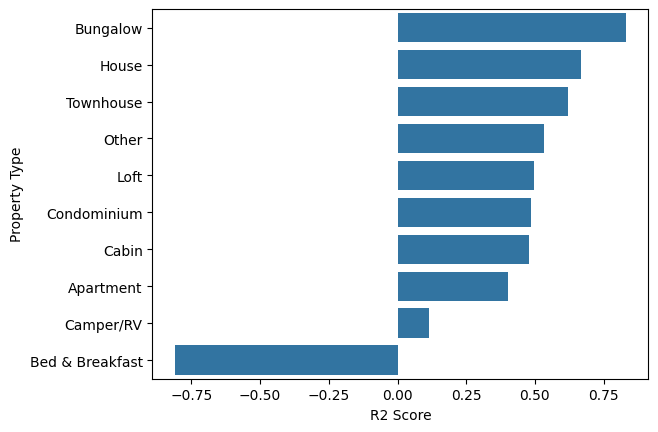

In [29]:
df_pred=pd.DataFrame([ [i,j] for i,j in zip(prop_type_order,prop_type_pred)], columns=['Property Type', 'R2 Score'])
df_pred=df_pred.sort_values(by='R2 Score',ascending=False)
sns.barplot(data=df_pred,y='Property Type',x='R2 Score')

Our model is vert well equipped at predicting prices for Bungalows, Houses and Townhouses, but is remarkably inept at predicting the prices for  Bed & Brakfasts, Campers and Apartments, the last of which is one of the major type of properties listed in Seattle.

In [31]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = clf.coef_
coefs_df['abs_coefs'] = abs(clf.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df.head(20)
#pd.DataFrame([X_train.columns,clf.coef_]

,est_int,coefs,abs_coefs
28,Doorman,47.079227,47.079227
62,room_type_Entire home/apt,36.923531,36.923531
4,bathrooms,33.050712,33.050712
64,room_type_Shared room,-33.028633,33.028633
59,property_type_Loft,32.126404,32.126404
5,bedrooms,31.052518,31.052518
23,"""Washer / Dryer""",-30.424064,30.424064
54,property_type_Bungalow,25.946275,25.946275
13,"""Hot Tub""",23.213761,23.213761
21,Internet,-22.382279,22.382279


The features with the highest weightage on predicting prices are
> * **Room Type**
>     * Whether it is Entire property or Shared room
> * **Amenities available**
>     * doorman
>     * washing machine/ dryer
>     * hot tub
>     * internet
>     * Elevator
>     * Air Conditioning
> * **Number of bedrooms/bathrooms**
> * **Property Type**
>     * Loft, Bungalow and Cabin seem to have the biggets effect


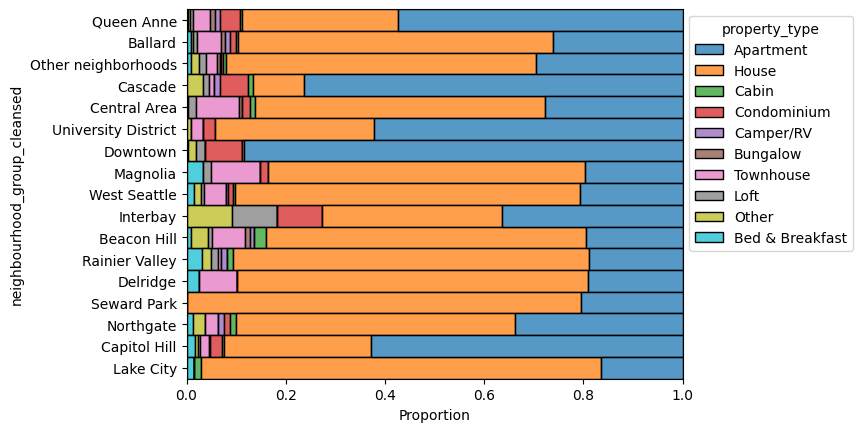

In [30]:
#df_listings.groupby(['zipcode','property_type']).id.count()
#sns.countplot(data=df_listings,x='zipcode',stat='percent')
#df_listings.plot.bar()
df_listings_lesstypes=df_listings
df_listings_lesstypes.property_type=df_listings_lesstypes.property_type.apply(lambda x : x if x in prop_type_order else 'Other')
ax = sns.histplot(
    data=df_listings_lesstypes,#.loc[df_listings.property_type.isin(prop_type_order)],
    y='neighbourhood_group_cleansed',
    hue='property_type',
    multiple='fill',
    stat='proportion')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

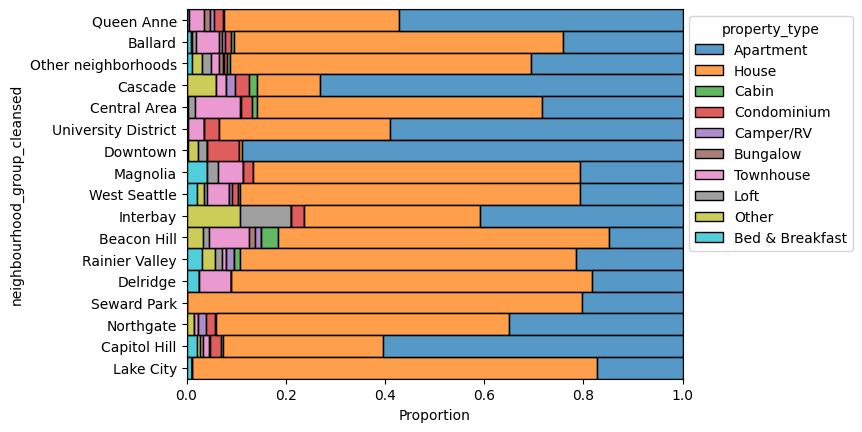

In [32]:
#df_id_nbr = df_listings[['neighbourhood_group_cleansed','id','property_type']].loc[df_listings.property_type.isin(prop_type_order)]
df_id_nbr = df_listings_lesstypes[['neighbourhood_group_cleansed','id','property_type']]

df_nbr = pd.merge(left=df_calendar,right=df_id_nbr,left_on='listing_id',right_on='id').drop(['id','date','listing_id'],axis=1)
df_nbr = df_nbr.loc[df_nbr.available=='t'].drop('available',axis=1)
#df_nbr = df_nbr.groupby(['neighbourhood_group_cleansed','property_type'],as_index=False).price.sum()

#sns.barplot(data=df_nbr,y='neighbourhood_group_cleansed',x='price')
ax = sns.histplot(
    data=df_nbr,
    y='neighbourhood_group_cleansed',
    hue='property_type',
    multiple='fill',
    stat='proportion')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))



<Axes: xlabel='price', ylabel='neighbourhood_group_cleansed'>

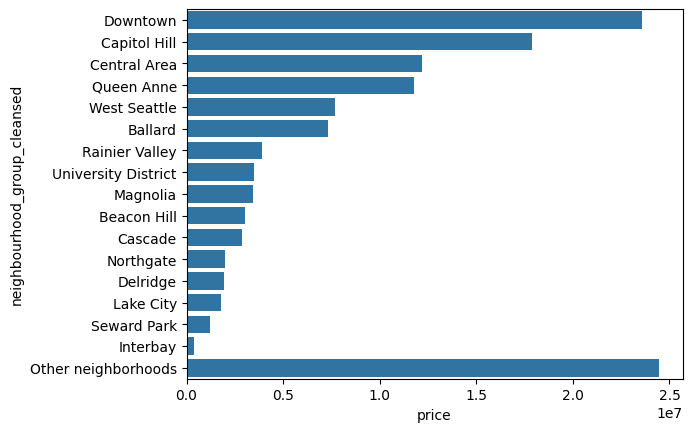

In [69]:
#df_listings.groupby('neighbourhood_cleansed').price.sum().sort_values(ascending=False)
#for i in df_listings.columns : print(i)
k = df_nbr.groupby('neighbourhood_group_cleansed',as_index=False).price.sum().sort_values(ascending=False,by='price')
order = k.neighbourhood_group_cleansed.tolist()
sns.barplot(data=k,
           y='neighbourhood_group_cleansed',x='price', order = order[1:]+[order[0]])


<Axes: xlabel='Count', ylabel='neighbourhood_group_cleansed'>

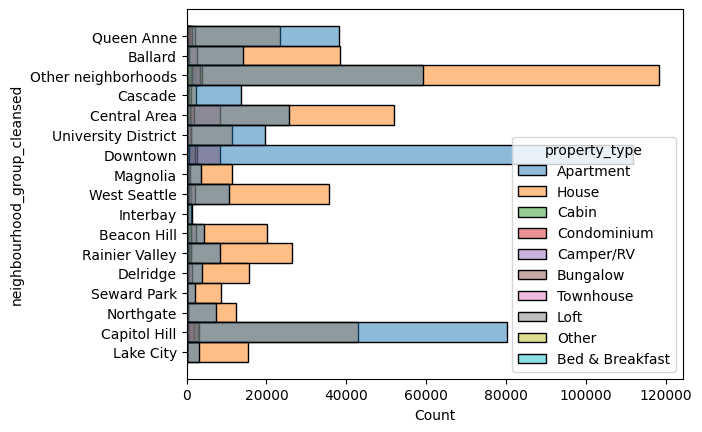

In [77]:
sns.histplot(
    data=df_nbr,
    y='neighbourhood_group_cleansed',
    hue='property_type',
    multiple='layer',
    stat='count')

<Axes: xlabel='Count', ylabel='neighbourhood_group_cleansed'>

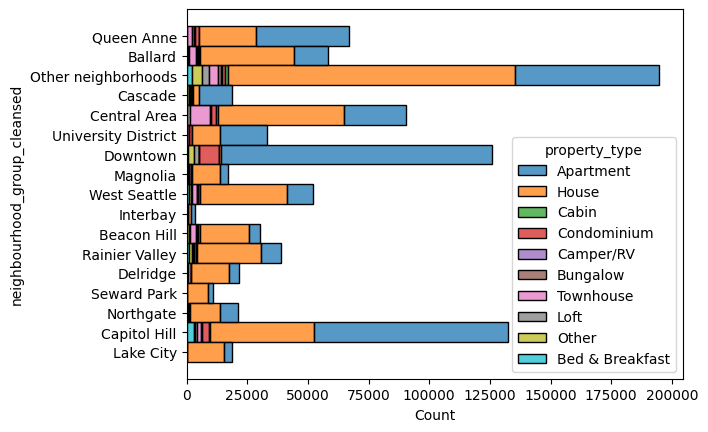

In [80]:
sns.histplot(
    data=df_nbr,
    y='neighbourhood_group_cleansed',
    hue='property_type',
    multiple='stack',
    stat='count')